In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [10]:
data = pd.read_csv("dataset/video games sales.csv")

In [11]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
# Inisialisasi imputasi
imputer = SimpleImputer(strategy='most_frequent')

# Kolom yang mengandung NaN
data[['Year', 'Publisher']] = imputer.fit_transform(data[['Year', 'Publisher']])

print(data.isnull().sum())


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [16]:
# Encode kolom kategorikal
categorical_cols = ['Platform', 'Genre', 'Publisher']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [17]:
# Drop kolom tidak relevan
data_clustering = data.drop(columns=['Rank', 'Name'])

In [18]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)
data_scaled = pd.DataFrame(data_scaled, columns=data_clustering.columns)


In [19]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))


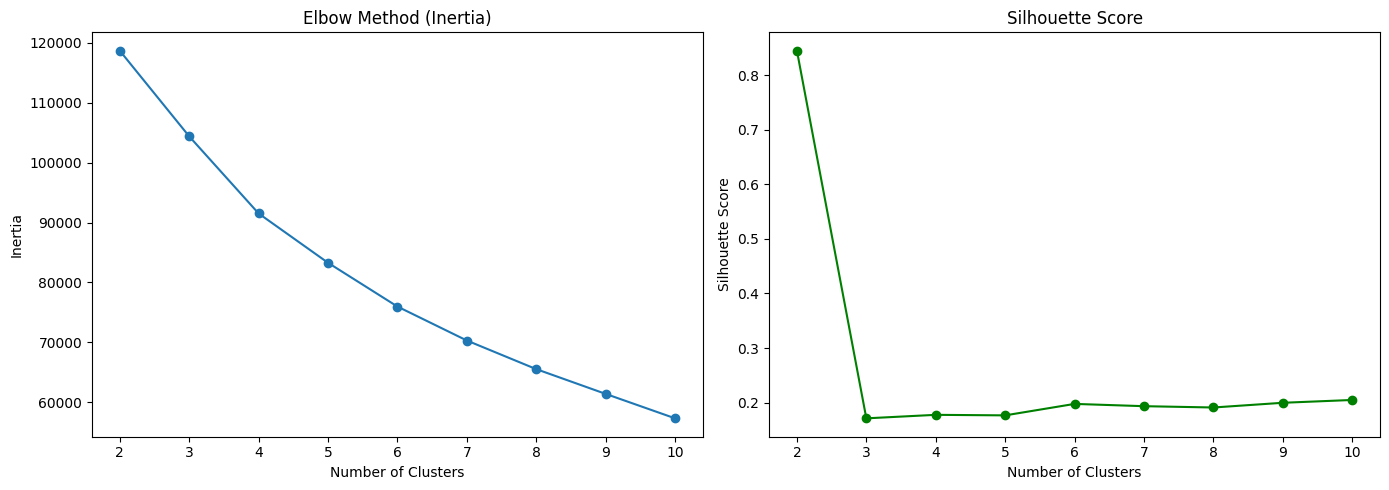

In [20]:
# Visualisasi Elbow Method dan Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

results = {}

In [27]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)
results['KMeans'] = {
    'labels': kmeans_labels,
    'silhouette': silhouette_score(data_scaled, kmeans_labels),
    'db_score': davies_bouldin_score(data_scaled, kmeans_labels)
}

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(data_scaled)
results['Agglomerative'] = {
    'labels': agglo_labels,
    'silhouette': silhouette_score(data_scaled, agglo_labels),
    'db_score': davies_bouldin_score(data_scaled, agglo_labels)
}

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
if len(set(dbscan_labels)) > 1:
    sil = silhouette_score(data_scaled, dbscan_labels)
    db = davies_bouldin_score(data_scaled, dbscan_labels)
else:
    sil = -1
    db = float('inf')

results['DBSCAN'] = {
    'labels': dbscan_labels,
    'silhouette': sil,
    'db_score': db
}

In [28]:
# Tabel evaluasi
compare_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Silhouette Score': [results[k]['silhouette'] for k in results],
    'Davies-Bouldin Score': [results[k]['db_score'] for k in results]
})
print(compare_df)

       Algorithm  Silhouette Score  Davies-Bouldin Score
0         KMeans          0.176674              1.447236
1  Agglomerative          0.155950              1.614378
2         DBSCAN          0.355418              1.842760


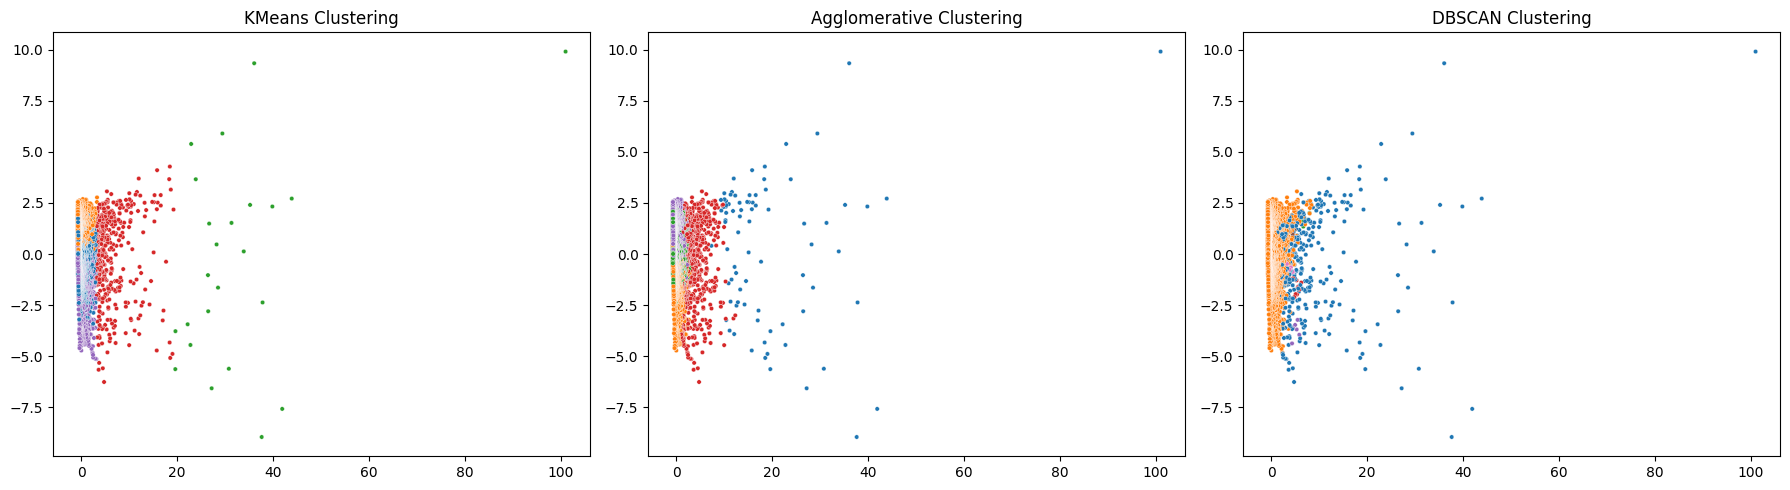

In [29]:
# Visualisasi
plt.figure(figsize=(18, 5))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=res['labels'], palette='tab10', s=10, legend=False)
    plt.title(f"{name} Clustering")
plt.tight_layout()
plt.show()